In [20]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [10]:
data_train = np.load('data/fashion_test.npy', mmap_mode='r')
data_test = np.load('data/fashion_train.npy', mmap_mode='r')

In [12]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]


In [13]:
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(X_train, y_train)
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In [18]:
transformed_X_train= clf.fit_transform(X_train, y_train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

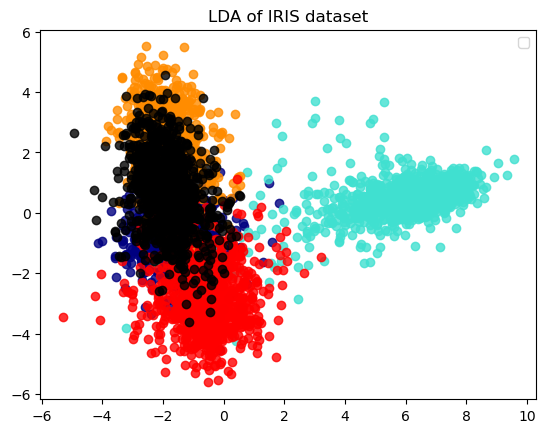

In [19]:
plt.figure()
colors = ["navy", "turquoise", "darkorange", 'red', 'black', 'green']

lw = 2
plt.figure()
for color, i in zip(colors, [0, 1, 2, 3, 4]):
    plt.scatter(
        transformed_X_train[y_train == i, 0], transformed_X_train[y_train == i, 1], alpha=0.8, color=color
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In [32]:
pca = PCA(n_components=2)
pca.fit(X_train)
PCA(n_components=2)

PCA(n_components=2)

In [34]:
pca_transformed_X_train= pca.fit_transform(X_train, y=None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

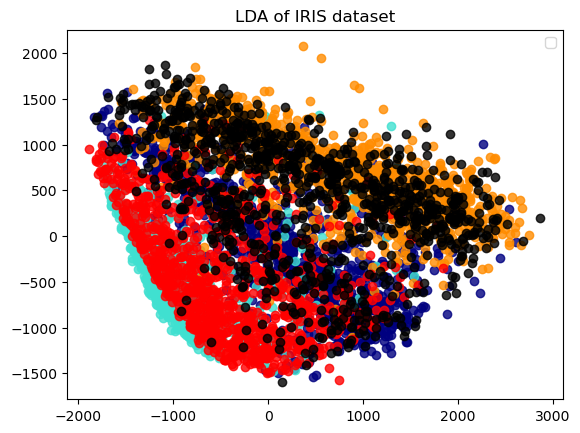

In [35]:
plt.figure()
colors = ["navy", "turquoise", "darkorange", 'red', 'black', 'green']

lw = 2
plt.figure()
for color, i in zip(colors, [0, 1, 2, 3, 4]):
    plt.scatter(
        pca_transformed_X_train[y_train == i, 0], pca_transformed_X_train[y_train == i, 1], alpha=0.8, color=color
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In [ ]:
class LDA():
    def __init__(self, ):
        pass

    def fit(self, X, y):
        pass